In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd


In [4]:
file_df = 'Wind_power'
df = pd.read_csv(file_df +'.csv', header=0)

In [17]:
df.columns

Index(['Year', 'Installed capacity (MW)', 'Total generation (Gwh)'], dtype='object')

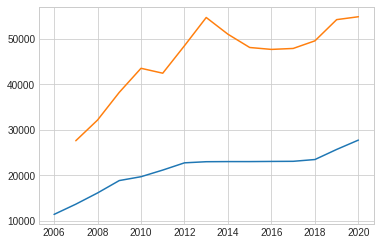

In [20]:
ax = plt.axes()
plt.plot(df['Year'],df['Installed capacity (MW)'])
plt.plot(df['Year'],df['Total generation (Gwh)'])

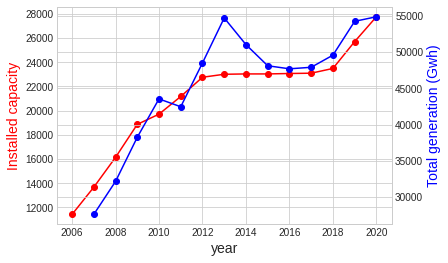

In [23]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df['Year'],df['Installed capacity (MW)'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Installed capacity",color="red",fontsize=14)

### the other graph
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Year'],df['Total generation (Gwh)'],color="blue",marker="o")
ax2.set_ylabel("Total generation (Gwh)",color="blue",fontsize=14)
plt.show()
# save the plot as a file



In [69]:
file_df = 'renovables_datos_test'
df = pd.read_csv(file_df +'.csv', header=0)

In [70]:
df.dtypes

Potencia MW     object
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
dtype: object

In [71]:
df1 = df.set_index('Potencia MW').T.reset_index()
df1.columns

Index(['index', 'Hydro', 'Mixed Pumping', 'Pumped storage', 'Nuclear', 'Coal',
       'Fuel + Gas', 'Diesel engines', 'Gas turbine', 'Steam turbine',
       'Combined cycle', 'Hydroeolian', 'Wind', 'Solar photovoltaic',
       'Thermal solar', 'Other renewables', 'Cogeneration',
       'Non-renewable waste', 'Renewable waste', 'Total capacity'],
      dtype='object', name='Potencia MW')

In [72]:
df1.rename(columns={'index':'year'}, inplace=True)
df1

Potencia MW,year,Hydro,Mixed Pumping,Pumped storage,Nuclear,Coal,Fuel + Gas,Diesel engines,Gas turbine,Steam turbine,Combined cycle,Hydroeolian,Wind,Solar photovoltaic,Thermal solar,Other renewables,Cogeneration,Non-renewable waste,Renewable waste,Total capacity
0,2015,17042.64,0.0,3331.4,7572.58,10962.42,7.95,811.27,1148.65,482.64,26636.00,11.32,22922.23,4680.96,2304.01,887.47,6238.17,452.21,153.32,105645.23
1,2016,17049.67,0.0,3331.4,7572.58,10030.29,7.95,811.27,1148.65,482.64,26636.00,11.32,22973.67,4685.79,2304.01,890.09,6016.26,440.28,153.32,104545.19
2,2017,17052.94,0.0,3331.4,7117.29,10030.29,7.95,811.27,1148.65,482.64,26636.00,11.32,23068.07,4687.99,2304.01,886.85,5850.54,444.28,157.32,104028.80
3,2018,17063.59,0.0,3331.4,7117.29,10030.29,7.95,811.27,1148.65,482.64,26250.15,11.32,23433.05,4766.75,2304.01,891.74,5837.78,444.28,157.32,104089.48
4,2019,17097.78,0.0,3331.4,7117.29,9683.45,7.95,768.67,1148.65,482.64,26250.15,11.32,25682.85,8782.90,2304.01,1041.97,5718.77,437.75,157.32,110024.86
5,2020,17097.68,0.0,3331.4,7117.29,5733.23,7.95,768.67,1148.65,482.64,26250.15,11.32,27494.39,11738.46,2304.01,1090.30,5702.85,428.07,157.32,110864.37
6,2021,17093.18,0.0,3331.4,7117.29,4883.72,7.95,768.67,1148.65,482.64,26250.15,11.32,27982.00,13602.47,2304.01,1090.61,5646.53,440.86,170.11,112331.55


In [73]:
df1.dtypes

Potencia MW
year                    object
Hydro                  float64
Mixed Pumping          float64
Pumped storage         float64
Nuclear                float64
Coal                   float64
Fuel + Gas             float64
Diesel engines         float64
Gas turbine            float64
Steam turbine          float64
Combined cycle         float64
Hydroeolian            float64
Wind                   float64
Solar photovoltaic     float64
Thermal solar          float64
Other renewables       float64
Cogeneration           float64
Non-renewable waste    float64
Renewable waste        float64
Total capacity         float64
dtype: object

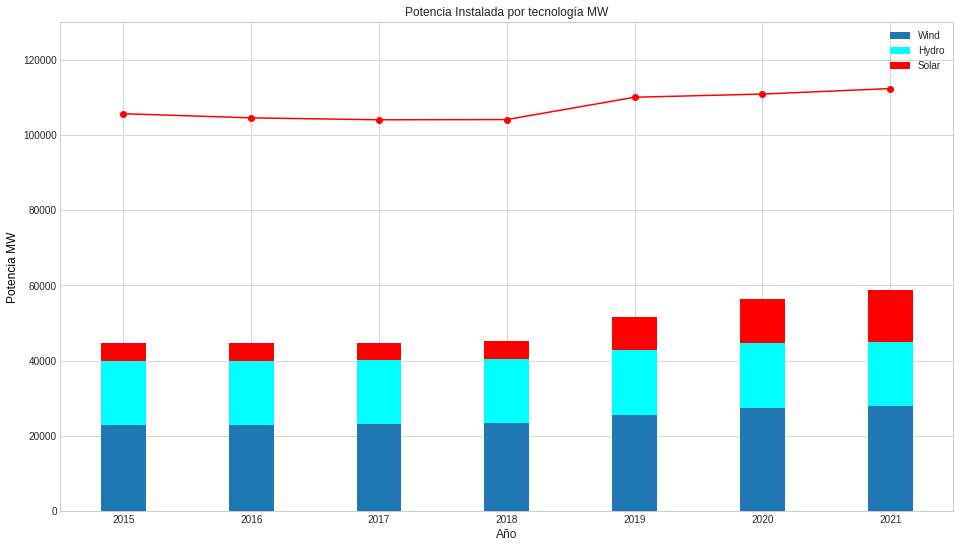

In [86]:
plt.rcParams["figure.figsize"] = [16,9]
fig,ax = plt.subplots()
# make a plot
ax.set_title('Potencia Instalada por tecnología MW')
ax.plot(df1['year'],df1['Total capacity'], color="red", marker="o")
ax.set_ylim([0,130000])
# set x-axis label
ax.set_xlabel("Año",fontsize=12)
# set y-axis label
ax.set_ylabel("Potencia MW",color="black",fontsize=12)

width = 0.35
ax.bar(df1['year'], df1['Wind'], width,  label='Wind')
ax.bar(df1['year'], df1['Hydro'], width,  label='Hydro', bottom = df1['Wind'], color='cyan')
ax.bar(df1['year'], df1['Solar photovoltaic'], width,  bottom = (df1['Wind']+df1['Hydro']),
       label='Solar', color='red')

ax.legend()

plt.show()
